In [14]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('creditcard.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [16]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


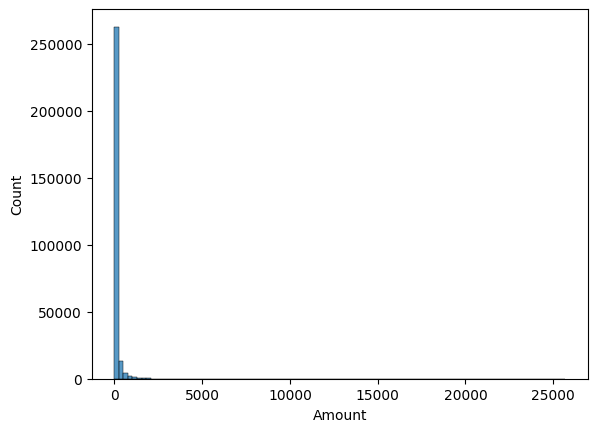

In [17]:
sns.histplot(df['Amount'], bins=100)
plt.show()

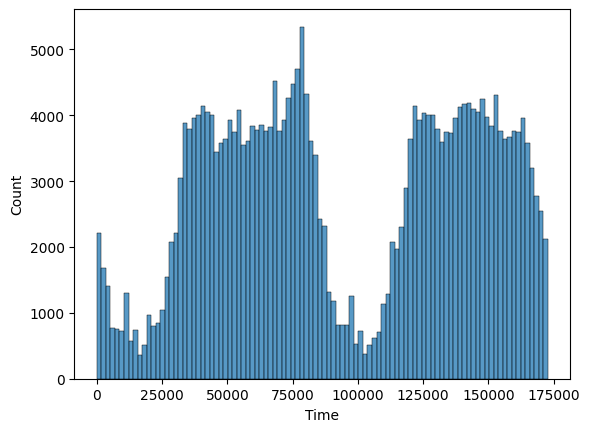

In [18]:
sns.histplot(df['Time'], bins=100)
plt.show()

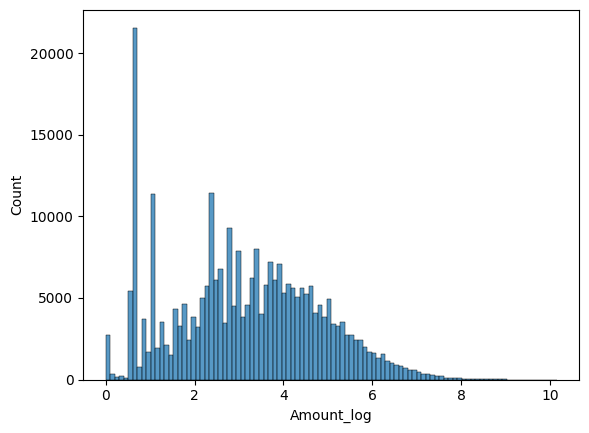

In [19]:
# log Amount 
import numpy as np
df['Amount_log'] = np.log1p(df['Amount'])
sns.histplot(df['Amount_log'], bins=100)
plt.show()

In [20]:
df['Class'].value_counts() / len(df) * 100

Class
0    99.827251
1     0.172749
Name: count, dtype: float64

In [21]:
df = df.drop(columns='Amount')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_log
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.014760
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,1.305626
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.939276
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.824306
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.262539


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df.drop(columns='Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(
    class_weight='balanced',
    solver='liblinear',
    C=1,
    max_iter=500
    )
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[55534  1330]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



#####  accuracy is high but Recall is low, which means many frauds are not detected. 

#### Tuning

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
}

grid = GridSearchCV(log_reg, param_grid=param_grid, scoring='average_precision')
grid.fit(X_train, y_train)

print(grid.best_estimator_)

LogisticRegression(C=10, class_weight='balanced', max_iter=500, penalty='l1',
                   solver='liblinear')


In [25]:
y_pred_log = grid.predict(X_test)

print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# Precision: TP / (TP+FP) = 0.06 (In predicted frauds, how many were actual fraud)
# Recall: TP/(TP+FN) = 0.92 (In actual frauds, how many the model detected)
# F1 Score: 0.12
# -> Low Precision and High Recall : flag many legit transactions as fraud(1343)


[[55525  1339]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [26]:
log_reg.predict_proba(X_test)

array([[0.        , 1.        ],
       [0.97464422, 0.02535578],
       [0.9754611 , 0.0245389 ],
       ...,
       [0.67321284, 0.32678716],
       [0.9842003 , 0.0157997 ],
       [0.41955036, 0.58044964]])

#### ROC Curve

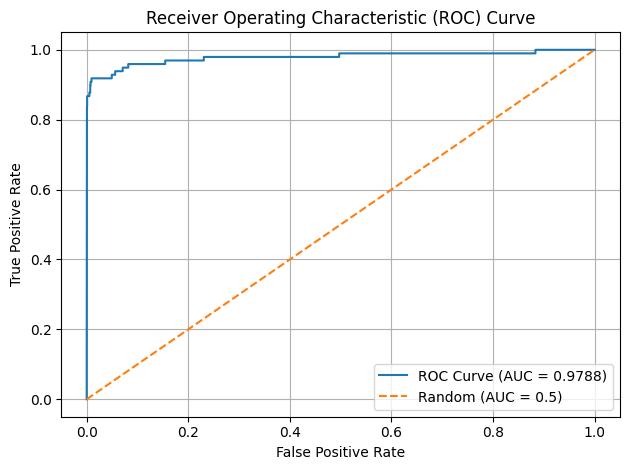

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

roc_auc = roc_auc_score(y_test, y_scores)
plt.plot(fpr, tpr,
         label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1],
         linestyle='--', label='Random (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

#### TPR : how many fraud cases the model catch 
#### FPR : how many legit transactions the model wrongly flag
### -> TPR is more important in fraud detection

## Precision-Recall Curve

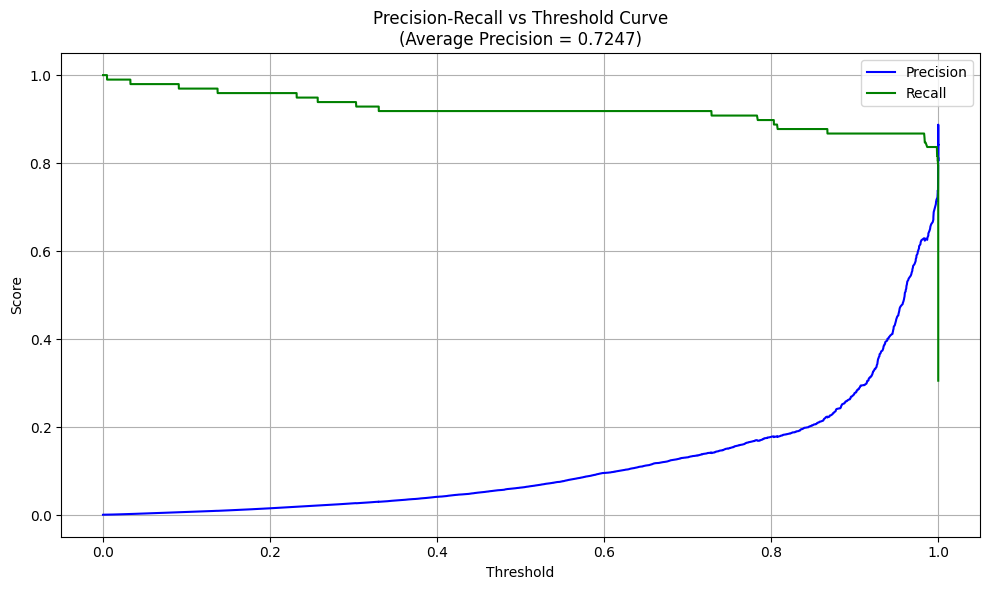

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

plt.figure(figsize=(10, 6))

plt.plot(thresholds, precision[:-1], label='Precision', color='b')
plt.plot(thresholds, recall[:-1], label='Recall', color='g')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title(
    f'Precision-Recall vs Threshold Curve\n(Average Precision = {avg_precision:.4f})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Recall (catching frauds):
# Missing fraud (false negative) means actual fraud slips through undetected → direct financial loss and risk.
# Usually, high recall is critical because letting frauds go unflagged is costly.

# Precision (avoiding false alarms):
# But if precision is too low, you flood the system with false fraud alerts → wasted resources investigating innocent transactions and customer dissatisfaction.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
best_thresh = 0.92
y_pred = (y_scores >= best_thresh).astype(int)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

[[56681   183]
 [   13    85]]
              precision    recall  f1-score   support

           0     0.9998    0.9968    0.9983     56864
           1     0.3172    0.8673    0.4645        98

    accuracy                         0.9966     56962
   macro avg     0.6585    0.9321    0.7314     56962
weighted avg     0.9986    0.9966    0.9974     56962

